Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder,PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

load Data

In [2]:
df=pd.read_csv(r"c:\Users\ezath\Downloads\archive (6)\StudentPerformanceFactors.csv")

Show Data

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [5]:
df.shape

(6607, 20)

In [6]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [7]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [9]:
df.select_dtypes(include=object)

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,High,Medium,No,Medium,Yes,High,Medium,Public,Positive,No,High School,Near,Female
6603,High,Medium,No,Medium,Yes,Low,High,Public,Positive,No,High School,Near,Female
6604,Medium,Low,Yes,Low,Yes,Low,Medium,Public,Negative,No,Postgraduate,Near,Female
6605,High,High,Yes,High,Yes,Low,Medium,Private,Positive,No,High School,Far,Female


In [10]:
hours_study=df['Hours_Studied']>35
hours_study.value_counts()

Hours_Studied
False    6574
True       33
Name: count, dtype: int64

In [11]:
hours_study=df['Tutoring_Sessions']>3
hours_study.value_counts()

Tutoring_Sessions
False    6177
True      430
Name: count, dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


Check For Null Values

In [13]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Handle null values

In [14]:
mod_columns=['Teacher_Quality','Parental_Education_Level','Distance_from_Home']
for col in mod_columns:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\ezath\AppData\Local\Temp\ipykernel_21052\880815421.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


Check for Duplicated Values

In [15]:
df.duplicated().sum()

np.int64(0)

Check for outliers

In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if df[(df[col] < lower) | (df[col] > upper)].shape[0] > 0:
        outlier_cols.append(col)

print(f"cols_Outliers: {outlier_cols}")

cols_Outliers: ['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']


Handle Outliers by Removing('Hours_Studied', 'Tutoring_Sessions')

In [17]:
remove = [ 'Hours_Studied', 'Tutoring_Sessions']
for col_1 in remove:
    Q1 = df[col_1].quantile(0.25)
    Q3 = df[col_1].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col_1] >= lower) & (df[col_1] <= upper)]

print(f"removed_cols_outliers: {remove}")
print(f"Number of rows after removing: {df.shape[0]}")

removed_cols_outliers: ['Hours_Studied', 'Tutoring_Sessions']
Number of rows after removing: 6134


Handle Outliers By Clipping

In [18]:
Q1 = df['Exam_Score'].quantile(0.25)
Q3 = df['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR 
df['Exam_Score'] = df['Exam_Score'].clip(lower, upper)
print(f"Number of rows after clipping: {df.shape[0]}")


Number of rows after clipping: 6134


EDA Visualization

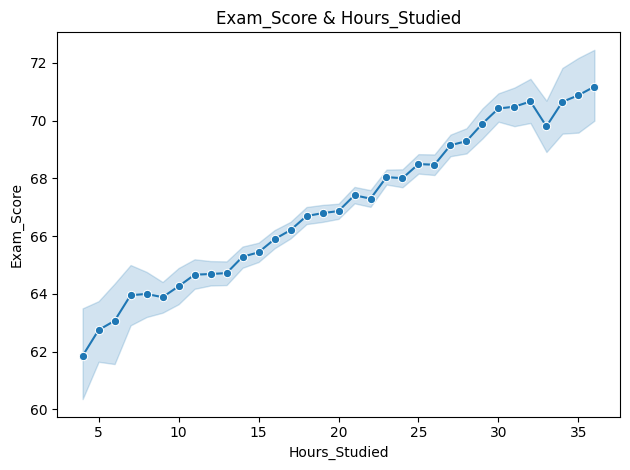

In [19]:
sns.lineplot(y=df['Exam_Score'],x=df['Hours_Studied'],marker='o')
plt.title('Exam_Score & Hours_Studied')
plt.tight_layout()
plt.show()

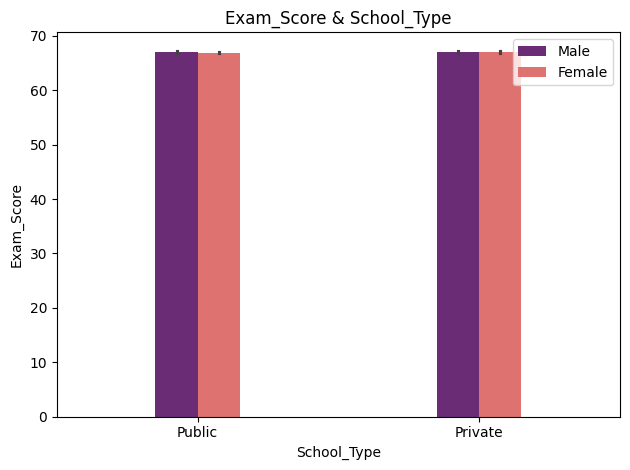

In [20]:
sns.barplot(y=df['Exam_Score'],x=df['School_Type'],width=0.3,palette='magma',hue=df['Gender'])
plt.legend(loc='upper right',ncol=1)
plt.title('Exam_Score & School_Type')
plt.tight_layout()
plt.show()

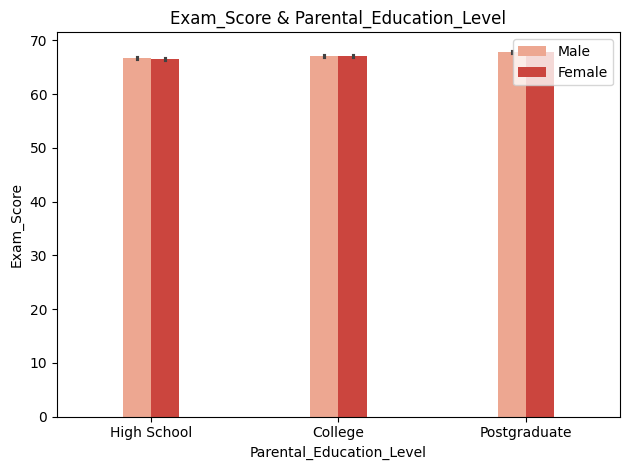

In [21]:
sns.barplot(x=df['Parental_Education_Level'],y=df['Exam_Score'],hue=df['Gender'],palette='Reds',width=0.3)
plt.legend(loc='upper right',ncol=1)
plt.title('Exam_Score & Parental_Education_Level')
plt.tight_layout()
plt.show()

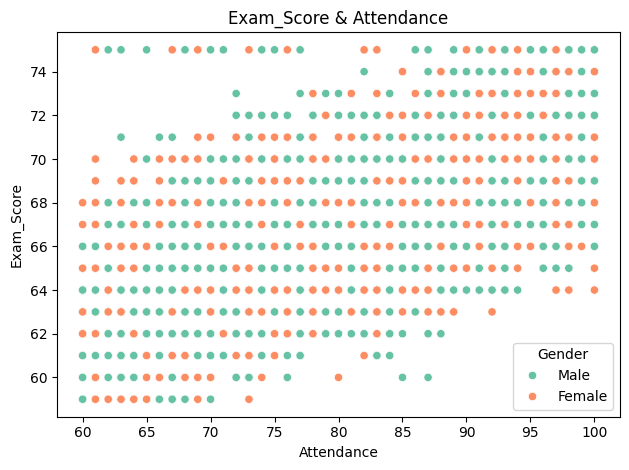

In [22]:
sns.scatterplot(x=df['Attendance'],y=df['Exam_Score'],hue=df['Gender'],palette='Set2')
plt.title('Exam_Score & Attendance')
plt.tight_layout()
plt.show()

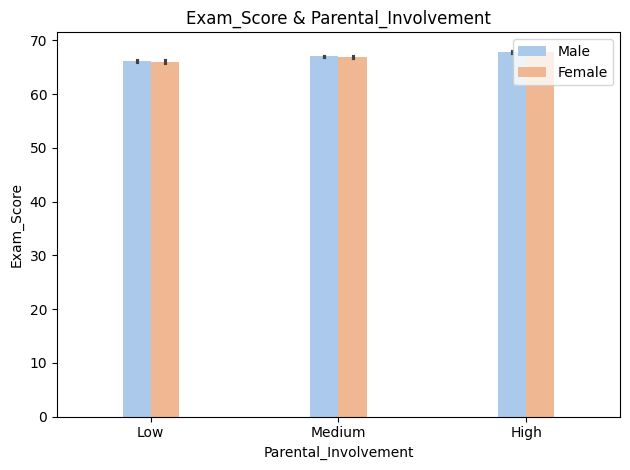

In [23]:
sns.barplot(x=df['Parental_Involvement'],y=df['Exam_Score'],hue=df['Gender'],palette='pastel',width=0.3)
plt.title('Exam_Score & Parental_Involvement')
plt.legend(loc='upper right',ncol=1)
plt.tight_layout()
plt.show()

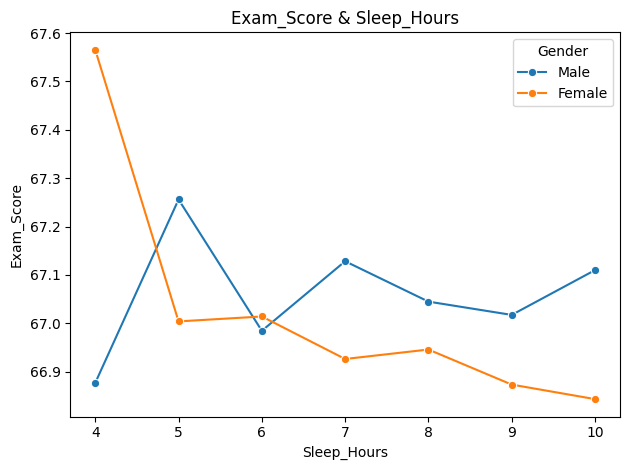

In [24]:
sns.lineplot(x=df['Sleep_Hours'],y=df['Exam_Score'],errorbar=None,marker='o',hue=df['Gender'])
plt.title('Exam_Score & Sleep_Hours')
plt.tight_layout()
plt.show()

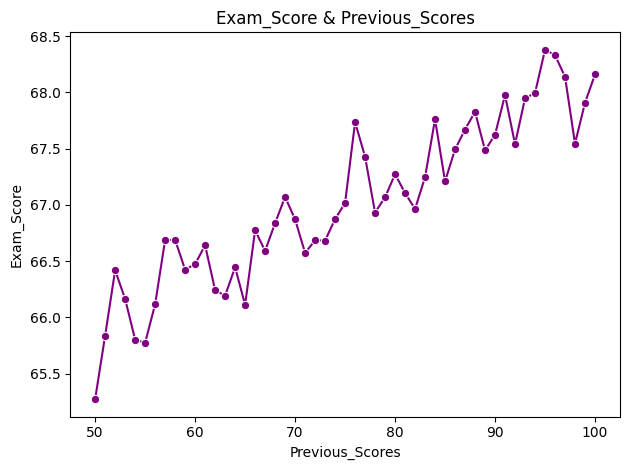

In [25]:
sns.lineplot(x=df['Previous_Scores'],y=df['Exam_Score'],color="purple",errorbar=None,marker='o')
plt.title('Exam_Score & Previous_Scores')
plt.tight_layout()
plt.show()

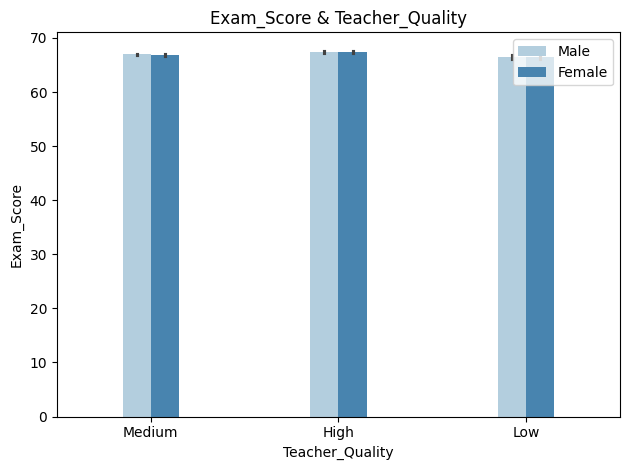

In [26]:
sns.barplot(x=df['Teacher_Quality'],y=df['Exam_Score'],hue=df['Gender'],palette='Blues',width=0.3)
plt.legend(loc='upper right',ncol=1)
plt.title('Exam_Score & Teacher_Quality')
plt.tight_layout()
plt.show()

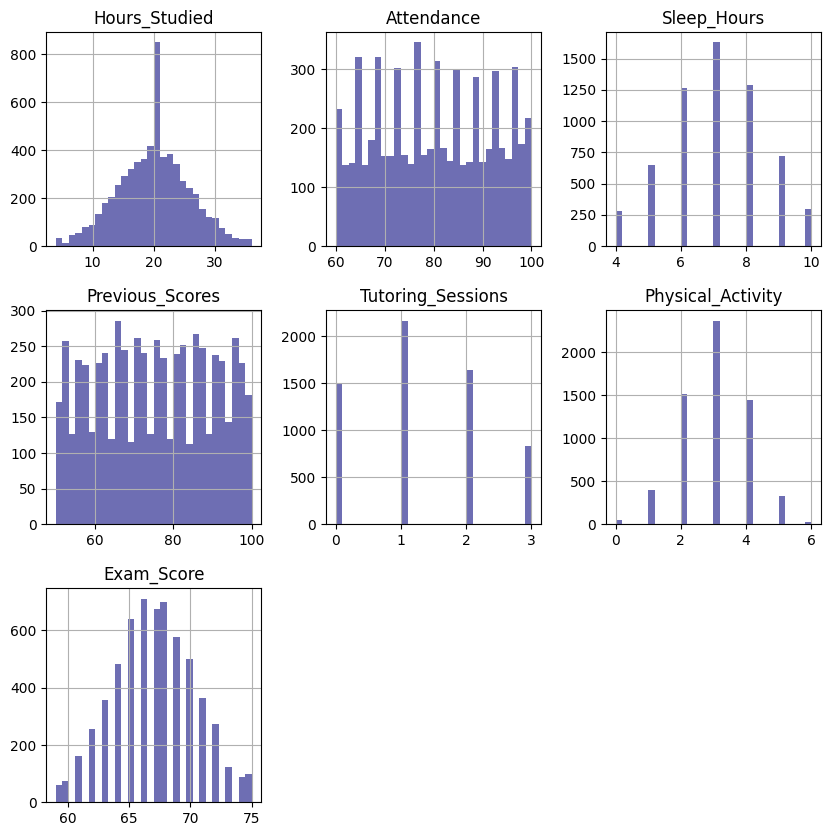

In [27]:
df.hist(figsize=(10,10),bins=30,color="#6e6eb3")
plt.show()

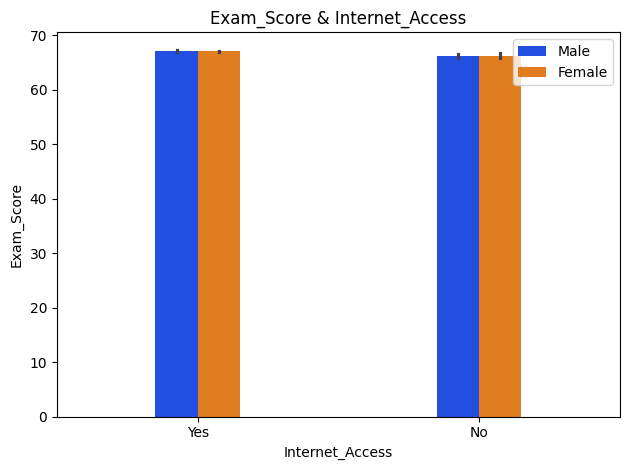

In [28]:
sns.barplot(x=df['Internet_Access'],y=df['Exam_Score'],hue=df['Gender'],palette='bright',width=0.3)
plt.legend(loc='upper right',ncol=1)
plt.title('Exam_Score & Internet_Access')
plt.tight_layout()
plt.show()

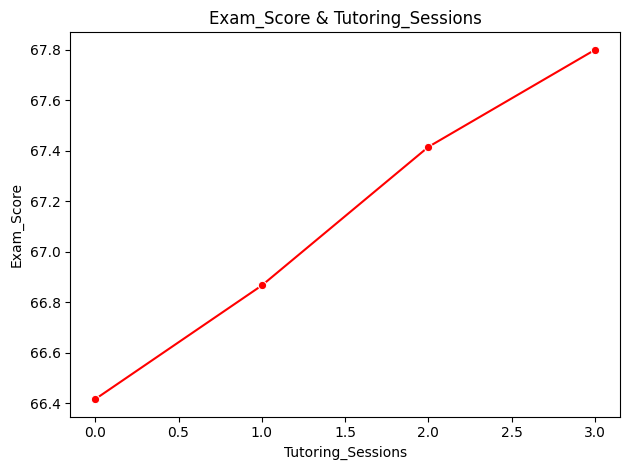

In [29]:
sns.lineplot(x=df['Tutoring_Sessions'],y=df['Exam_Score'],errorbar=None,marker='o',color='red')
plt.title('Exam_Score & Tutoring_Sessions')
plt.tight_layout()
plt.show()

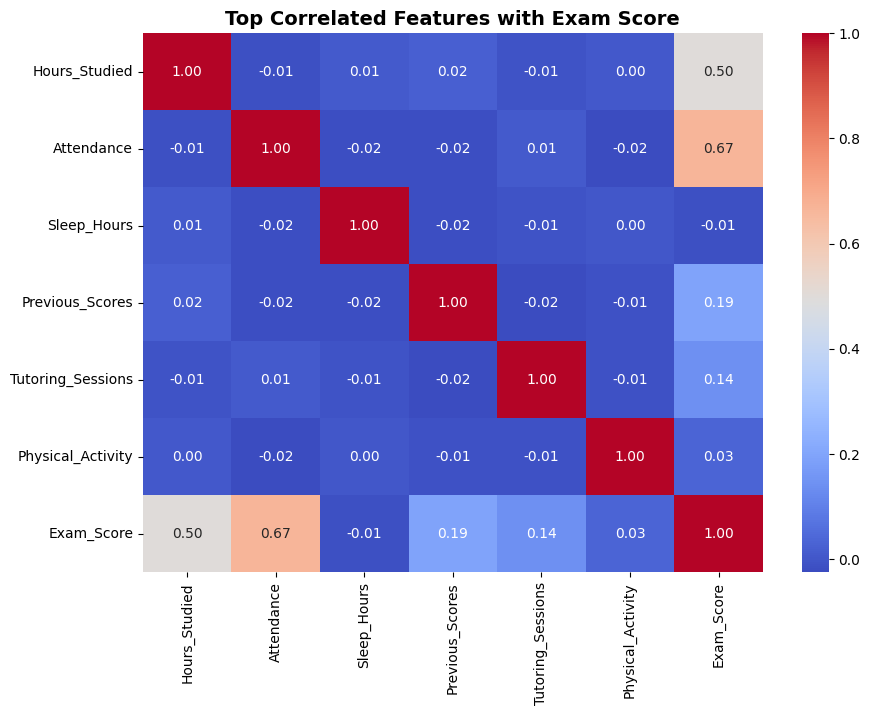

In [30]:
numeric=df.select_dtypes(include=['int64'])
plt.figure(figsize=(10,7))
sns.heatmap(numeric.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("Top Correlated Features with Exam Score", fontsize=14, fontweight='bold')
plt.show()

Data Preprocessing

Label Encoding

In [31]:
label_cols=['Extracurricular_Activities','Internet_Access','Learning_Disabilities']
for label_col in label_cols:
    le=LabelEncoder()
    df[label_col]=le.fit_transform(df[label_col])

One Hot Encoding

In [32]:
df = pd.get_dummies(df, columns=['Gender','School_Type'], drop_first=True)
one_hot_bool_cols = [col for col in df.columns if df[col].dtype == 'bool']
df[one_hot_bool_cols] = df[one_hot_bool_cols].astype(int)

Ordinal Encoding

In [33]:
orders = {
    'Parental_Involvement': ['Low','Medium','High'],
    'Access_to_Resources': ['Low','Medium','High'],
    'Motivation_Level': ['Low','Medium','High'],
    'Family_Income': ['Low','Medium','High'],
    'Teacher_Quality': ['Low','Medium','High'],
    'Parental_Education_Level': ['High School','College','Postgraduate'],
    'Peer_Influence': ['Negative','Neutral','Positive'], 
    'Distance_from_Home': ['Near','Moderate','Far']
}

for col, order in orders.items():
    encoder = OrdinalEncoder(categories=[order])  
    df[col] = encoder.fit_transform(df[[col]])

split data

In [34]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling

In [36]:
numeric_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

Training Model

In [37]:
poly=PolynomialFeatures(degree=2,include_bias=False)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [38]:
models={
    'Linear':LinearRegression(),
    'Ridge':Ridge(alpha=1.0),
    'Lasso':Lasso(alpha=0.1),
    'ElasticNet':ElasticNet(alpha=0.1,l1_ratio=0.5),
    'PolynomialFeatures':LinearRegression()
}

Evalution

In [39]:
results = {}

for name, model in models.items():
    if name == "PolynomialFeatures":
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
    }

for name, metrics in results.items():
    print(f"--- {name} Regression ---")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")
    print("\n")

--- Linear Regression ---
MAE: 0.3537
MSE: 0.8350
RMSE: 0.9138
R2: 0.9250


--- Ridge Regression ---
MAE: 0.3538
MSE: 0.8349
RMSE: 0.9138
R2: 0.9250


--- Lasso Regression ---
MAE: 0.6743
MSE: 1.2355
RMSE: 1.1115
R2: 0.8890


--- ElasticNet Regression ---
MAE: 0.5859
MSE: 1.0822
RMSE: 1.0403
R2: 0.9028


--- PolynomialFeatures Regression ---
MAE: 0.3905
MSE: 0.8669
RMSE: 0.9311
R2: 0.9221




 1. Linear Regression Visualization

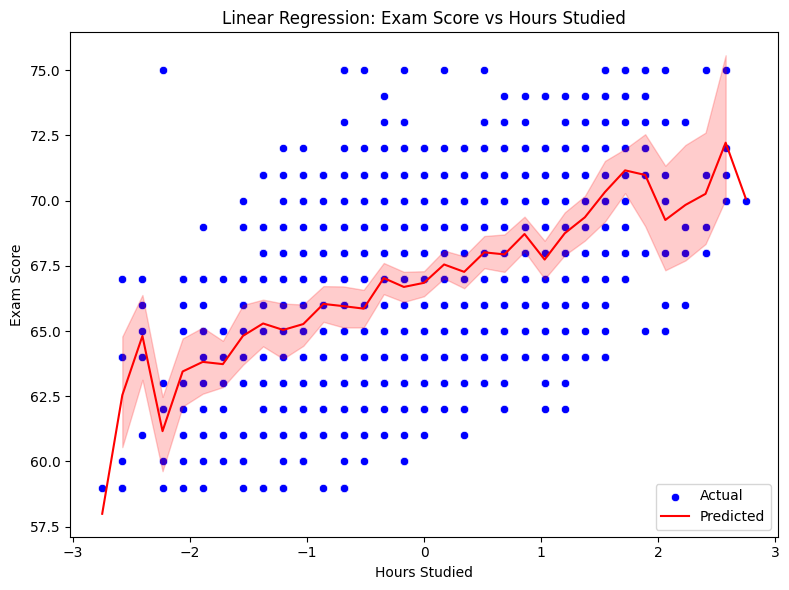

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['Hours_Studied'], y=y_test, color="blue", label="Actual")
sns.lineplot(x=X_test['Hours_Studied'], 
             y=models['Linear'].predict(X_test), 
             color="red", label="Predicted")
plt.title("Linear Regression: Exam Score vs Hours Studied")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.tight_layout()
plt.show()


Polynomial Regression Visualization


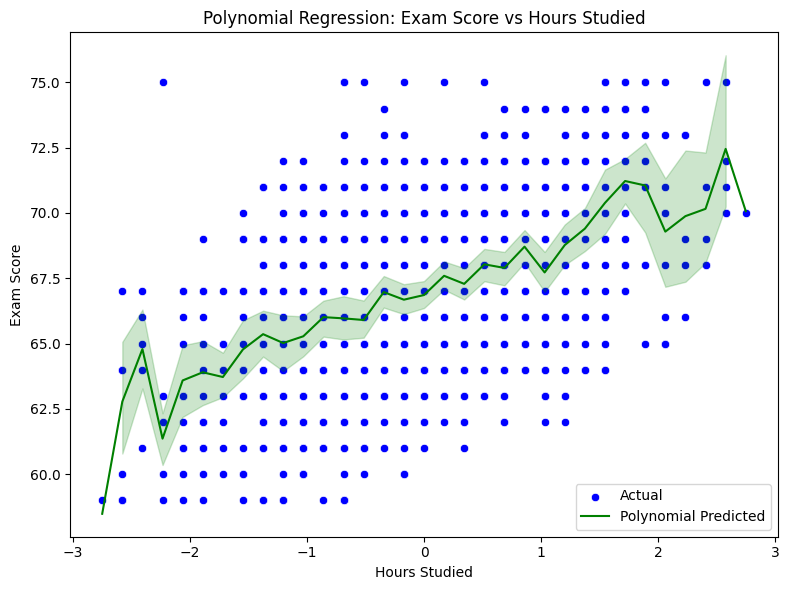

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['Hours_Studied'], y=y_test, color="blue", label="Actual")
sns.lineplot(x=X_test['Hours_Studied'], 
             y=models['PolynomialFeatures'].predict(X_test_poly), 
             color="green", label="Polynomial Predicted")
plt.title("Polynomial Regression: Exam Score vs Hours Studied")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.tight_layout()
plt.show()

 2. Comparison Between Models (Barplot)


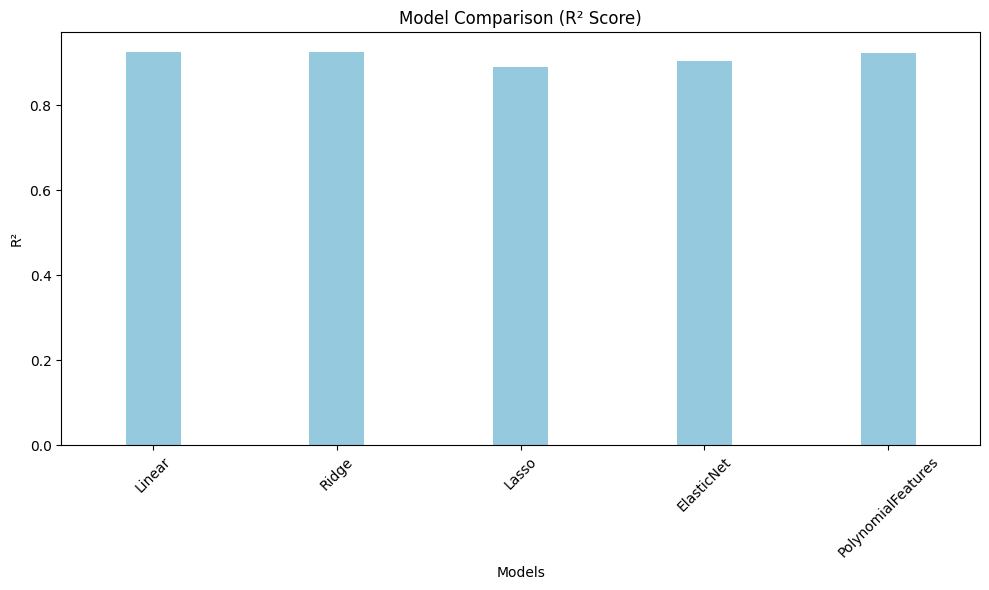

In [42]:
metrics_df = pd.DataFrame(results).T  
plt.figure(figsize=(10,6))
sns.barplot(x=metrics_df.index, y=metrics_df['R2'],width=0.3,color='skyblue')
plt.title("Model Comparison (R² Score)")
plt.ylabel("R²")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

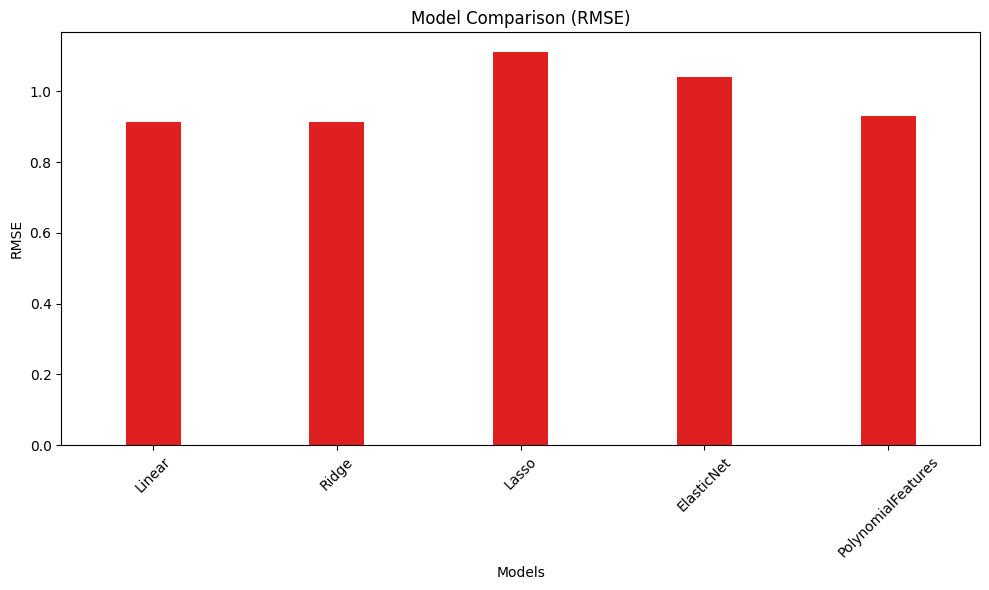

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x=metrics_df.index, y=metrics_df['RMSE'],width=0.3,color='red')
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()